In [1]:
%pylab inline
import desispec
import desitarget
import desimodel.io
print('desimodel ', desimodel.__version__)
print('desispec  ', desispec.__version__)
print('desitarget', desitarget.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
import glob
import os
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib
desimodel  0.12.0.dev597
desispec   0.33.0.dev3890
desitarget 0.37.0.dev3908


# Data for observation conditions of miniSV2 and SVo tiles commisioning.

In [2]:
path_cond_comisioning="/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/"

In [3]:
os.listdir(path_cond_comisioning)

['offline_all_guide_ccds_SV0.fits',
 'offline_all_guide_ccds_thru_20200315.fits',
 'offline_all_guide_ccds_minisv2.fits']

In [4]:
print("Night conditions for minisv2: "+os.listdir(path_cond_comisioning)[2])
print("Night conditions for SV0: "+os.listdir(path_cond_comisioning)[0])
print("Night conditions for all commissioning: "+os.listdir(path_cond_comisioning)[1])

Night conditions for minisv2: offline_all_guide_ccds_minisv2.fits
Night conditions for SV0: offline_all_guide_ccds_SV0.fits
Night conditions for all commissioning: offline_all_guide_ccds_thru_20200315.fits


In [5]:
#!fitsheader /global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_all_guide_ccds_minisv2.fits

In [6]:
cond_SV0=Table(fitsio.read("/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_all_guide_ccds_SV0.fits", ext=1))
cond_SV2=Table(fitsio.read("/global/cfs/cdirs/desi/users/ameisner/GFA/conditions/offline_all_guide_ccds_minisv2.fits", ext=1))

cond_SV2.columns

<TableColumns names=('MEDIAN','MEAN','N_NON_FINITE','MAX','MIN','SIG_ROBUST','SIG','MEDIAN_Q1','MEAN_Q1','N_NON_FINITE_Q1','MAX_Q1','MIN_Q1','SIG_ROBUST_Q1','SIG_Q1','MEDIAN_Q2','MEAN_Q2','N_NON_FINITE_Q2','MAX_Q2','MIN_Q2','SIG_ROBUST_Q2','SIG_Q2','MEDIAN_Q3','MEAN_Q3','N_NON_FINITE_Q3','MAX_Q3','MIN_Q3','SIG_ROBUST_Q3','SIG_Q3','MEDIAN_Q4','MEAN_Q4','N_NON_FINITE_Q4','MAX_Q4','MIN_Q4','SIG_ROBUST_Q4','SIG_Q4','CAMERA','SKY_MAG_AB','SKY_MAG_AB_PER_AMP','PETAL_LOC','EXPID','MJD','PROGRAM','SKYRA','SKYDEC','DOMSHUTL','DOMSHUTU','PMCOVER','MOONRA','MOONDEC','T_C_FOR_DARK','T_C_FOR_DARK_IS_GUESS','TIME_S_FOR_DARK','AIRMASS','NIGHT','FOCUS','EXPTIME','CUBE_INDEX','RACEN','DECCEN','FNAME_RAW','GITREV','EXTNAME','CONTRAST','FIBER_FRACFLUX','N_SOURCES_FOR_PSF','APER_CORR_FAC','XCENTROID_PSF','YCENTROID_PSF','MOON_SEP_DEG','ZP_ADU_PER_S','TRANSPARENCY','NPIX_BAD_TOTAL','NPIX_BAD_PER_AMP','OVERSCAN_MEDIANS_ADU','PRESCAN_MEDIANS_ADU','FWHM_MAJOR_PIX','FWHM_MINOR_PIX','FWHM_PIX','FWHM_ASEC','N_SO

In [7]:
pd.DataFrame(np.unique(cond_SV2["NIGHT"],return_counts=True))

,0,1,2,3,4,5,6,7,8,9
0,20200219,20200220,20200224,20200225,20200226,20200227,20200228,20200229,20200303,20200304
1,12138,3378,5520,6342,8250,6912,8646,1104,11250,13062


# Data for coadds miniSV2 and SV0 tiles commisioning (BGS objects).

In [8]:
### BGS objects.
path_coadds="/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/"

In [9]:
unique_days=np.unique(cond_SV2["NIGHT"])
unique_spectro_id=np.unique(cond_SV2["SPECTRO_EXPID"])

In [10]:
for filename in os.listdir(path_coadds):
    for j in unique_days:
        if filename.endswith(".fits") and "20200225" in filename and 'coadd' in filename and '00052112' in filename and '-7-' in filename:
            print(filename)
        else:
            continue

coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits
coadd-70502-20200225-7-00052112.fits


In [11]:
data_vis=Table(fitsio.read("/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66014-20200314-1-00055432.fits", ext=1))
np.unique(data_vis["OBJTYPE"])

SKY
TGT


In [12]:
cond_SV2[(cond_SV2["NIGHT"]==20200225)&(cond_SV2["SPECTRO_EXPID"]==52112)&(cond_SV2["PETAL_LOC"]==7)][0:5].columns

<TableColumns names=('MEDIAN','MEAN','N_NON_FINITE','MAX','MIN','SIG_ROBUST','SIG','MEDIAN_Q1','MEAN_Q1','N_NON_FINITE_Q1','MAX_Q1','MIN_Q1','SIG_ROBUST_Q1','SIG_Q1','MEDIAN_Q2','MEAN_Q2','N_NON_FINITE_Q2','MAX_Q2','MIN_Q2','SIG_ROBUST_Q2','SIG_Q2','MEDIAN_Q3','MEAN_Q3','N_NON_FINITE_Q3','MAX_Q3','MIN_Q3','SIG_ROBUST_Q3','SIG_Q3','MEDIAN_Q4','MEAN_Q4','N_NON_FINITE_Q4','MAX_Q4','MIN_Q4','SIG_ROBUST_Q4','SIG_Q4','CAMERA','SKY_MAG_AB','SKY_MAG_AB_PER_AMP','PETAL_LOC','EXPID','MJD','PROGRAM','SKYRA','SKYDEC','DOMSHUTL','DOMSHUTU','PMCOVER','MOONRA','MOONDEC','T_C_FOR_DARK','T_C_FOR_DARK_IS_GUESS','TIME_S_FOR_DARK','AIRMASS','NIGHT','FOCUS','EXPTIME','CUBE_INDEX','RACEN','DECCEN','FNAME_RAW','GITREV','EXTNAME','CONTRAST','FIBER_FRACFLUX','N_SOURCES_FOR_PSF','APER_CORR_FAC','XCENTROID_PSF','YCENTROID_PSF','MOON_SEP_DEG','ZP_ADU_PER_S','TRANSPARENCY','NPIX_BAD_TOTAL','NPIX_BAD_PER_AMP','OVERSCAN_MEDIANS_ADU','PRESCAN_MEDIANS_ADU','FWHM_MAJOR_PIX','FWHM_MINOR_PIX','FWHM_PIX','FWHM_ASEC','N_SO

In [13]:
#!fitsheader /global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-70502-20200225-7-00052112.fits

## Get all tiles, night (days), petals and expid for all coadd availables.

### To measure the signal / noise ratio, we take the interval of the first 1/3 of the spectrum at the lowest wavelengths and calculate the mean value (μ) and also the standard deviation (σ). So from here we get a measure of

$$SN_{frac}=P_{signal}/P_{noise}=\mu/\sigma, $$

In [14]:
tile,day,petalloc,expid,SN_frac,SN_z_spec,SN_z=[],[],[],[],[],[],[]
means_spec,std_spec=[],[]
for filename in os.listdir(path_coadds):
    if filename.endswith(".fits") and 'coadd' in filename:
        print("found a coadds:")
        print(path_coadds+filename)
        data=Table(fitsio.read(path_coadds+filename, ext=1))
        data2=Table(fitsio.read(path_coadds+filename, ext=2))
        data3=fitsio.read(path_coadds+filename, ext=3)
        
        for i in np.arange(0,len(data3),1):
            len_data=round(len(data3)/3)
            #print(i, np.nanmean(data3[i][0:len_data])/np.nanstd(data3[i][0:len_data]))
            SN_z_spec.append(abs(np.nanmean(data3[i][0:len_data])/np.nanstd(data3[i][0:len_data],ddof=1)))
        issky=data["OBJTYPE"]=="SKY"
        print("For coadd: ",filename,"S/N fraction is = ",len(data)/len(data[issky]))
        print("For coadd: ",filename,"SN_z_spec fraction is = ",np.nanmean(SN_z_spec))
        name=filename
        tile.append(name.split("-")[1])
        day.append(name.split("-")[2])
        petalloc.append(name.split("-")[3])
        expid.append(name.split("-")[4][3:-5])
        SN_frac.append(len(data)/len(data[issky]))
        SN_z.append(np.nanmean(SN_z_spec))
    else:
        continue
tile,day,petalloc,expid,SN_frac,SN_z=np.array(tile),np.array(day),np.array(petalloc),np.array(expid),np.array(SN_frac),np.array(SN_z)

found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66000-20200314-7-00055442.fits


/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in float_scalars


For coadd:  coadd-66000-20200314-7-00055442.fits S/N fraction is =  4.854368932038835
For coadd:  coadd-66000-20200314-7-00055442.fits SN_z_spec fraction is =  0.5912055
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-70510-20200304-6-00053082.fits
For coadd:  coadd-70510-20200304-6-00053082.fits S/N fraction is =  4.504504504504505
For coadd:  coadd-70510-20200304-6-00053082.fits SN_z_spec fraction is =  0.5102443
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66000-20200314-0-00055442.fits
For coadd:  coadd-66000-20200314-0-00055442.fits S/N fraction is =  4.201680672268908
For coadd:  coadd-66000-20200314-0-00055442.fits SN_z_spec fraction is =  0.5034435
found a coadds:
/global/cfs/cdirs/desi/users/chahah/bgs_exp_coadd/coadd-66014-20200314-8-00055435.fits
For coadd:  coadd-66014-20200314-8-00055435.fits S/N fraction is =  4.424778761061947
For coadd:  coadd-66014-20200314-8-00055435.fits SN_z_spec fraction is =  0.50505894
found a co

### Putting all this information in a separate file for make future comparisons.

In [15]:
results=pd.DataFrame({'tile':tile, 'day':day, 'petalloc':petalloc, 'expid':expid, 'SN_frac':SN_frac, 'SN_z':SN_z})

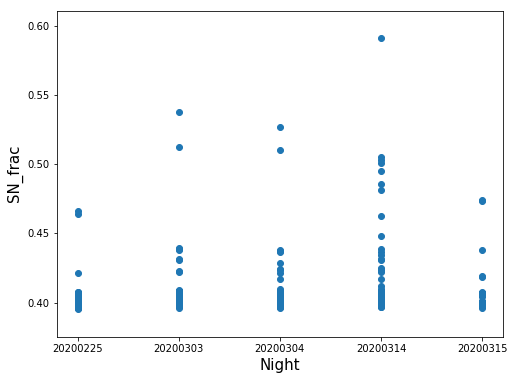

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(results["day"],results["SN_z"])
plt.ylabel("SN_frac",fontsize=15)
plt.xlabel("Night",fontsize=15)
plt.show()

In [17]:
results[0:5]

,tile,day,petalloc,expid,SN_frac,SN_z
0,66000,20200314,7,55442,4.854369,0.591205
1,70510,20200304,6,53082,4.504505,0.510244
2,66000,20200314,0,55442,4.201681,0.503443
3,66014,20200314,8,55435,4.424779,0.505059
4,66000,20200314,5,55442,3.816794,0.501258


In [18]:
results.iloc[0][0]

'66000'

### Now filtering for each coadd availables and matching with the onformation on observation conditions and stored all this information in a general file.

In [20]:
tile,day,petalloc,expid,SN_frac=[],[],[],[],[]
sky_mag_AB,airmass,contrast,transparency,fwhm_asec,program,fiber_fracflux,sky_mag_AB_per_amp,moon_sep_deg=[],[],[],[],[],[],[],[],[]
sky_mag_AB_std,airmass_std,contrast_std,transparency_std,fwhm_asec_std,fiber_fracflux_std,sky_mag_AB_per_amp_std,moon_sep_deg_std=[],[],[],[],[],[],[],[]
for r in np.arange(0,len(results),1):
    isnight=cond_SV2["NIGHT"]==int(results.iloc[r][1])
    ispetal=cond_SV2["PETAL_LOC"]==int(results.iloc[r][2])
    isexpid=cond_SV2["EXPID"]==int(results.iloc[r][3])
    if len(cond_SV2[isnight&ispetal&isexpid])>0:
        print(int(results.iloc[r][1]),int(results.iloc[r][2]),int(results.iloc[r][3]),len(cond_SV2[isnight&ispetal&isexpid]),
             np.nanmean(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]),np.nanmin(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]),
             np.nanmax(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]))
        tile.append(results.iloc[r][0])
        day.append(results.iloc[r][1])
        petalloc.append(results.iloc[r][2])
        expid.append(results.iloc[r][3])
        SN_frac.append(results.iloc[r][5])
        sky_mag_AB.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]))
        sky_mag_AB_per_amp.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB_PER_AMP"]))
        moon_sep_deg.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["MOON_SEP_DEG"]))
        airmass.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["AIRMASS"]))
        contrast.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["CONTRAST"]))
        transparency.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["TRANSPARENCY"]))
        fwhm_asec.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["FWHM_ASEC"]))
        fiber_fracflux.append(np.nanmean(cond_SV2[isnight&ispetal&isexpid]["FIBER_FRACFLUX"]))
        program.append((cond_SV2[isnight&ispetal&isexpid]["PROGRAM"][0]).split(" ")[0])
        sky_mag_AB_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB"]))
        airmass_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["AIRMASS"]))
        contrast_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["CONTRAST"]))
        transparency_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["TRANSPARENCY"]))
        fwhm_asec_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["FWHM_ASEC"]))
        fiber_fracflux_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["FIBER_FRACFLUX"]))
        sky_mag_AB_per_amp_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["SKY_MAG_AB_PER_AMP"]))
        moon_sep_deg_std.append(np.nanstd(cond_SV2[isnight&ispetal&isexpid]["MOON_SEP_DEG"]))

tile,day,petalloc,expid,SN_frac=np.array(tile),np.array(day),np.array(petalloc),np.array(expid),np.array(SN_frac)
sky_mag_AB,airmass,contrast,transparency,fwhm_asec=np.array(sky_mag_AB),np.array(airmass),np.array(contrast),np.array(transparency),np.array(fwhm_asec)
sky_mag_AB_std,airmass_std,contrast_std=np.array(sky_mag_AB_std),np.array(airmass_std),np.array(contrast_std)
transparency_std,fwhm_asec_std=np.array(transparency_std),np.array(fwhm_asec_std)
program=np.array(program)
fiber_fracflux,fiber_fracflux_std=np.array(fiber_fracflux),np.array(fiber_fracflux_std)
results_all=pd.DataFrame({'program':program, 'tile':tile, 'day':day, 'petalloc':petalloc, 'expid':expid, 'SN_frac':SN_frac, 'sky_mag_AB':sky_mag_AB, 
                          'airmass':airmass, 'sky_mag_AB_per_amp':sky_mag_AB_per_amp, 'moon_sep_deg':moon_sep_deg,
                      'contrast':contrast, 'transparency':transparency, 'fwhm_asec':fwhm_asec, 'fiber_fracflux':fiber_fracflux, 'sky_mag_AB_std':sky_mag_AB_std, 
                          'airmass_std':airmass_std, 'contrast_std':contrast_std, 'transparency_std':transparency_std, 'fwhm_asec_std':fwhm_asec_std, 
                         'fiber_fracflux_std':fiber_fracflux_std, 'sky_mag_AB_per_amp_std':sky_mag_AB_per_amp_std, 'moon_sep_deg_std':moon_sep_deg_std})

20200304 3 53086 67 20.148015558173075 20.05817530917834 20.235817956515454
20200225 7 52112 107 21.492212586420813 21.288205960237864 21.681045567858227
20200304 3 53083 67 20.017715900426225 19.935547219970466 20.07599713159297
20200304 0 53086 67 20.060550661405976 19.97815153637632 20.158726385342995
20200303 7 52942 130 19.62166445829995 19.584443666848397 19.660338573119354
20200304 7 53082 67 20.144537650791843 20.074667041158545 20.210195010474457
20200304 7 53081 67 20.099796204971923 20.02686301669012 20.16342903807764
20200304 0 53089 67 20.1638714596996 20.041270931070706 20.2475541783638
20200304 3 53081 67 20.000125476379097 19.857758186718748 20.088696097060307
20200303 3 52942 130 19.431011074077954 19.385751323549606 19.467001831417814
20200304 7 53080 67 20.03475257267997 19.94692797277068 20.09628510414147
20200303 7 52938 128 19.652869596768 19.60277943181013 19.687220987595076
20200304 3 53087 67 20.18239261798021 20.075302955485093 20.252697136650504
20200304 3 53

In [21]:
results_all

,program,tile,day,petalloc,expid,SN_frac,sky_mag_AB,airmass,sky_mag_AB_per_amp,moon_sep_deg,...,fwhm_asec,fiber_fracflux,sky_mag_AB_std,airmass_std,contrast_std,transparency_std,fwhm_asec_std,fiber_fracflux_std,sky_mag_AB_per_amp_std,moon_sep_deg_std
0,MW,70510,20200304,3,53086,0.527167,20.148016,1.101940,20.148022,76.386948,...,0.963023,0.599304,0.041809,0.000000e+00,0.366971,0.152443,0.110252,0.119810,0.045005,0.000041
1,SV,70502,20200225,7,52112,0.464024,21.492213,1.376164,21.492987,173.631936,...,2.946302,0.096774,0.090498,6.661338e-16,0.700801,26.050800,0.676361,0.029085,0.102461,0.016591
2,MW,70510,20200304,3,53083,0.436442,20.017716,1.203612,20.018118,76.745092,...,0.986377,0.510226,0.037982,2.220446e-16,0.407109,0.139301,0.144246,0.094184,0.043120,0.000044
3,MW,70510,20200304,0,53086,0.437892,20.060551,1.101940,20.060446,78.065003,...,1.001283,0.412456,0.044258,0.000000e+00,0.554006,0.055657,0.112403,0.053003,0.045963,0.000072
4,MW+BGS,70500,20200303,7,52942,0.438245,19.621664,1.457899,19.621687,35.351535,...,1.326782,0.456350,0.016173,2.220446e-16,1.423998,0.015533,0.131471,0.061392,0.018410,0.001015
5,MW,70510,20200304,7,53082,0.437239,20.144538,1.247667,20.145487,79.834692,...,0.975191,0.502730,0.034230,2.220446e-16,0.539955,0.050667,0.123205,0.038701,0.037046,0.000039
6,MW,70510,20200304,7,53081,0.421567,20.099796,1.298488,20.100470,79.950962,...,1.025718,0.462707,0.035634,2.220446e-16,0.516858,0.061137,0.112782,0.046481,0.037633,0.000035
7,MW,70510,20200304,0,53089,0.424415,20.163871,1.040688,20.163692,77.717198,...,1.383603,0.284508,0.055702,2.220446e-16,0.565430,0.065459,0.217413,0.046202,0.058240,0.000162
8,MW,70510,20200304,3,53081,0.423504,20.000125,1.298488,20.000126,76.969847,...,0.978162,0.540749,0.045422,2.220446e-16,0.376008,0.109192,0.101792,0.075619,0.048241,0.000036
9,MW+BGS,70500,20200303,3,52942,0.422069,19.431011,1.457899,19.430923,33.742577,...,1.328350,0.454110,0.012582,2.220446e-16,1.325190,0.006934,0.141888,0.062256,0.016300,0.000662


In [22]:
vars=['sky_mag_AB', 'airmass', 'contrast', 'transparency', 'fwhm_asec', 'fiber_fracflux', 'sky_mag_AB_per_amp', 'moon_sep_deg']

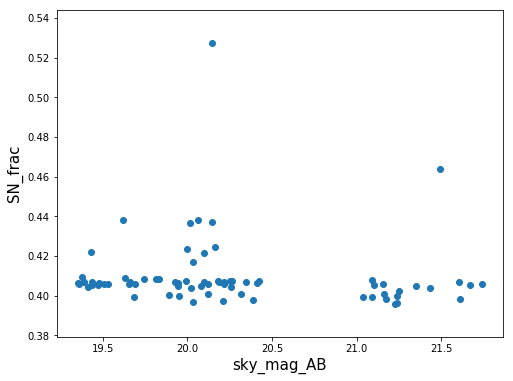

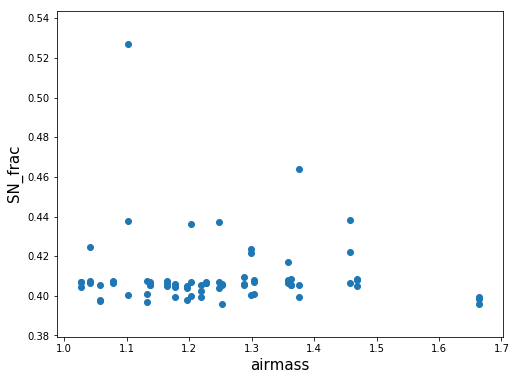

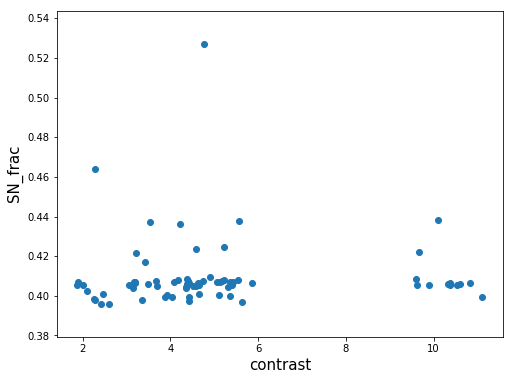

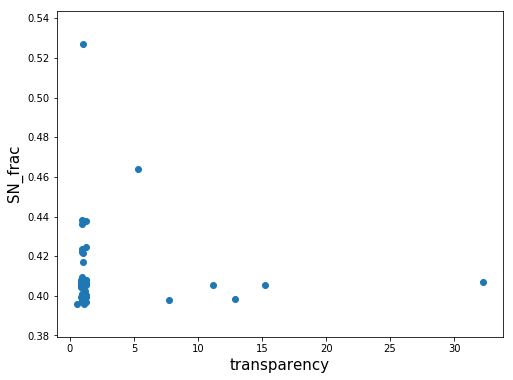

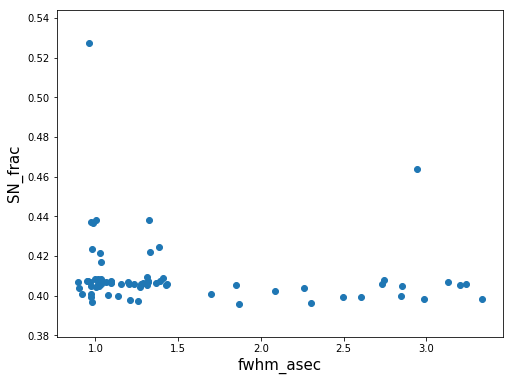

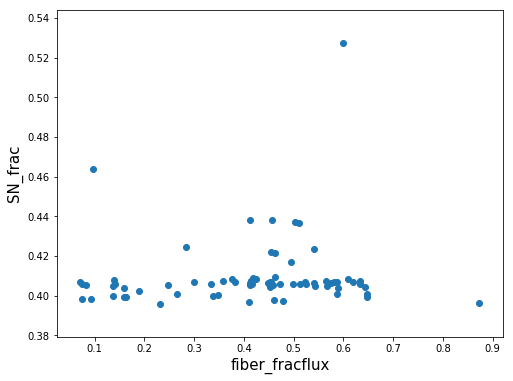

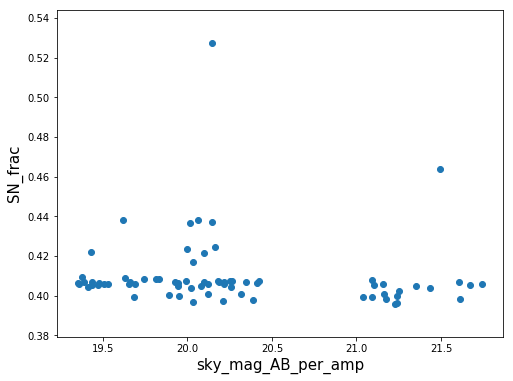

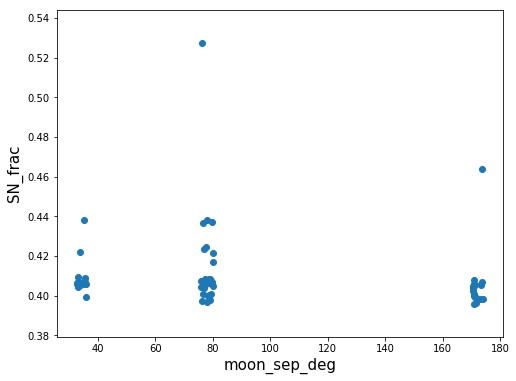

In [23]:
for i in vars:
    plt.figure(figsize=(8,6))
    plt.scatter(results_all[i],results_all["SN_frac"])
    plt.ylabel("SN_frac",fontsize=15)
    plt.xlabel(i,fontsize=15)
    plt.show()

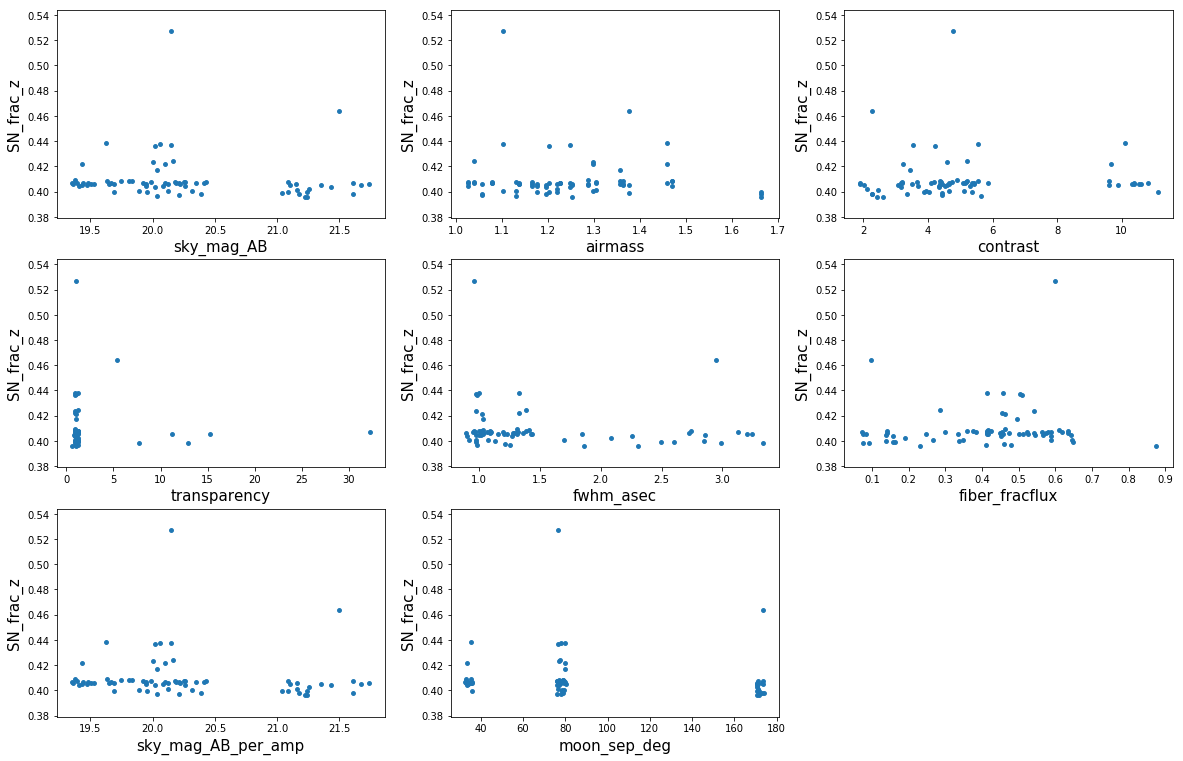

In [26]:
plt.figure(figsize=(20,13))
plt.subplot(3, 3, 1)
plt.scatter(results_all[vars[0]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[0],fontsize=15)
plt.subplot(3, 3, 2)
plt.scatter(results_all[vars[1]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[1],fontsize=15)
plt.subplot(3, 3, 3)
plt.scatter(results_all[vars[2]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[2],fontsize=15)
plt.subplot(3, 3, 4)
plt.scatter(results_all[vars[3]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[3],fontsize=15)
plt.subplot(3, 3, 5)
plt.scatter(results_all[vars[4]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[4],fontsize=15)
plt.subplot(3, 3, 6)
plt.scatter(results_all[vars[5]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[5],fontsize=15)
plt.subplot(3, 3, 7)
plt.scatter(results_all[vars[6]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[6],fontsize=15)
plt.subplot(3, 3, 8)
plt.scatter(results_all[vars[7]],results_all["SN_frac"],s=15)
plt.ylabel("SN_frac_z",fontsize=15)
plt.xlabel(vars[7],fontsize=15)

plt.show()

In [ ]:
results_all[results_all["expid"]==55380]

In [ ]:
results